In [1]:
# git partially cloning
repo='cvnd-exercises'
sub_dir='1_2_Convolutional_Filters_Edge_Detection'
url='https://github.com/linked0/' + repo + '.git'
!mkdir $repo
%cd $repo
!git init
!git remote add -f origin $url
!git config core.sparsecheckout true
!echo $sub_dir >> .git/info/sparse-checkout
!git pull --recurse-submodules origin master
%cd $sub_dir
!ls


mkdir: cannot create directory ‘cvnd-exercises’: File exists
/content/cvnd-exercises
Reinitialized existing Git repository in /content/cvnd-exercises/.git/
fatal: remote origin already exists.
remote: Counting objects: 4, done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 4 (delta 2), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (4/4), done.
From https://github.com/linked0/cvnd-exercises
 * branch            master     -> FETCH_HEAD
   35a034d..65ee508  master     -> origin/master
Updating 35a034d..65ee508
Fast-forward
 .../4. Fourier Transform of Filters.ipynb          | 642 +++++++++++++++++----
 1 file changed, 535 insertions(+), 107 deletions(-)
/content/cvnd-exercises/1_2_Convolutional_Filters_Edge_Detection
1. Fourier Transform.ipynb
2. Finding Edges and Custom Kernels.ipynb
3. Gaussian Blur.ipynb
4. Fourier Transform of Filters.ipynb
5. Canny Edge Detection.ipynb
6_1. Hough lines.ipynb
6_2. Hough circles, agriculture.ipynb
7. Haar Cascade, Face Detec

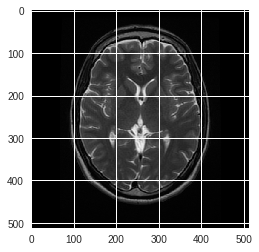

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

# Read in the image
image = cv2.imread('images/brain_MR.jpg')

# Change color to RGB (from BGR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)

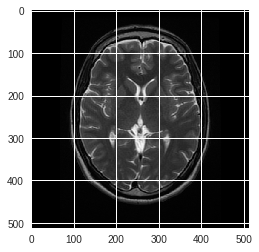

In [3]:
# Convert the image to grayscale for processing
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

plt.imshow(gray, cmap='gray')

### Implement Canny edge detection

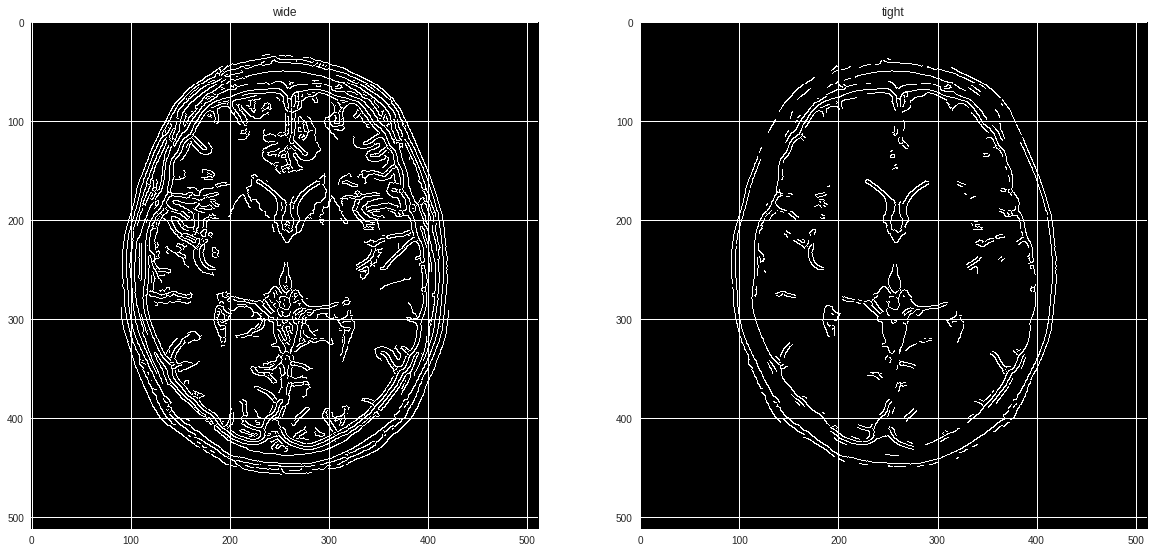

In [4]:
# Try Canny using "wide" and "tight" thresholds

wide = cv2.Canny(gray, 30, 100)
tight = cv2.Canny(gray, 200, 240)
 
    
# Display the images
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))

ax1.set_title('wide')
ax1.imshow(wide, cmap='gray')

ax2.set_title('tight')
ax2.imshow(tight, cmap='gray')

### TODO: Try to find the edges of this flower

Set a small enough threshold to isolate the boundary of the flower.

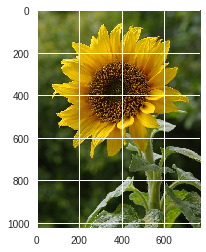

In [5]:
# Read in the image
image = cv2.imread('images/sunflower.jpg')

# Change color to RGB (from BGR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)

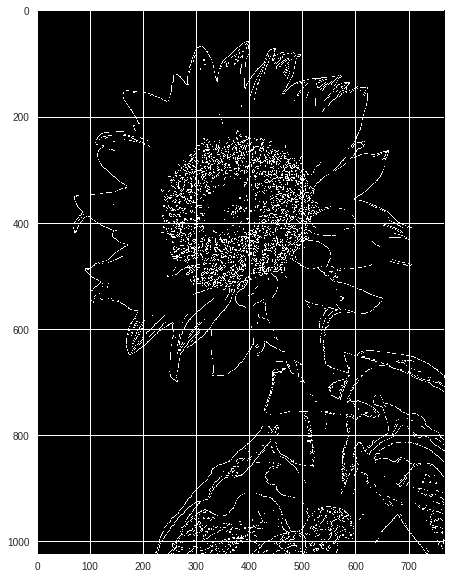

In [8]:
# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

## TODO: Define lower and upper thresholds for hysteresis
# right now the threshold is so small and low that it will pick up a lot of noise
lower = 200
upper = 240

edges = cv2.Canny(gray, lower, upper)

plt.figure(figsize=(20,10))
plt.imshow(edges, cmap='gray')